# Basics of cluster analysis

In this notebook we explore the very basics of cluster analysis with k-means

## Import the relevant libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn using the new set_theme function
sns.set_theme(style="whitegrid", palette="muted")

# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the data

In [6]:
# Load the country clusters data
data = pd.read_csv('countries.csv')

In [7]:
# Check out the data manually 
data

,ountry,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


## Plot the data

<function matplotlib.pyplot.show(close=None, block=None)>

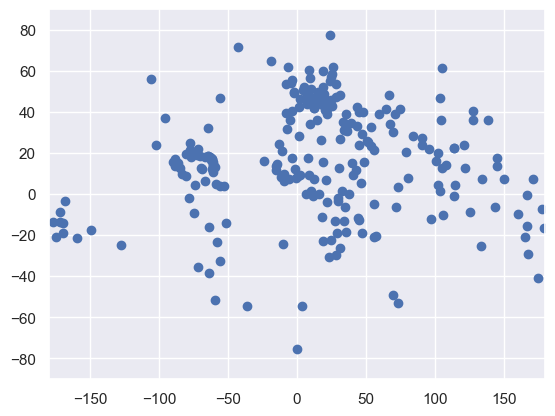

In [9]:
# Use the simplest code possible to create a scatter plot using the longitude and latitude
# Note that in order to reach a result resembling the world map, we must use the longitude as y, and the latitude as x
plt.scatter(data['longitude'],data['latitude'])
# Set limits of the axes, again to resemble the world map
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

## Select the features

In [10]:
# iloc is a method used to 'slice' data 
# 'slice' is not technically correct as there are methods 'slice' which are a bit different
# The term used by pandas is 'selection by position'
# The first argument of identifies the rows we want to keep
# The second - the columns
# When choosing the columns, e.g. a:b, we will keep columns a,a+1,a+2,...,b-1 ; so column b is excluded
x = data.iloc[:,1:3]
# for this particular case, we are choosing columns 1 and 2
# Note column indices in Python start from 0

In [11]:
# Check if we worked correctly
x

,latitude,longitude
0,42.546245,1.601554
1,23.424076,53.847818
2,33.939110,67.709953
3,17.060816,-61.796428
4,18.220554,-63.068615
...,...,...
240,15.552727,48.516388
241,-12.827500,45.166244
242,-30.559482,22.937506
243,-13.133897,27.849332


## Clustering

This is the part of the sheet which deals with the actual clustering

In [27]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(4)

In [28]:
# Drop rows with missing values
x = x.dropna()

# Fit the input data, i.e. cluster the data in X in K clusters
kmeans.fit(x)

c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

## Clustering results

There are many ways to do this part, we found this to be the most illustrative one

In [29]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters

c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 3, 2, 1, 0, 2, 2, 0, 1, 2, 2, 2,
       2, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 3, 0,
       2, 1, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 1, 0, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0,
       2, 1, 2, 2, 1, 3, 2, 0, 1, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 0, 2, 0, 2, 2, 1, 2, 0,
       1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1, 1, 3, 1, 2, 0, 0, 3, 1, 1, 2, 2,
       0, 3, 0, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 1, 2, 1, 2, 3, 1, 2, 2, 3, 2,
       0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 3, 3, 2, 2, 2, 2,
       2, 2])

In [30]:
# Drop rows with missing values from the original data
data_cleaned = data.dropna().reset_index(drop=True)

# Perform clustering on the cleaned data
x_cleaned = data_cleaned.iloc[:, 1:3]
identified_clusters_cleaned = kmeans.fit_predict(x_cleaned)

# Create a copy of the cleaned data
data_with_clusters = data_cleaned.copy()

# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters_cleaned

# Check the result
data_with_clusters

c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,ountry,latitude,longitude,name,Cluster
0,AD,42.546245,1.601554,Andorra,1
1,AE,23.424076,53.847818,United Arab Emirates,1
2,AF,33.939110,67.709953,Afghanistan,1
3,AG,17.060816,-61.796428,Antigua and Barbuda,2
4,AI,18.220554,-63.068615,Anguilla,2
...,...,...,...,...,...
238,YE,15.552727,48.516388,Yemen,1
239,YT,-12.827500,45.166244,Mayotte,1
240,ZA,-30.559482,22.937506,South Africa,1
241,ZM,-13.133897,27.849332,Zambia,1


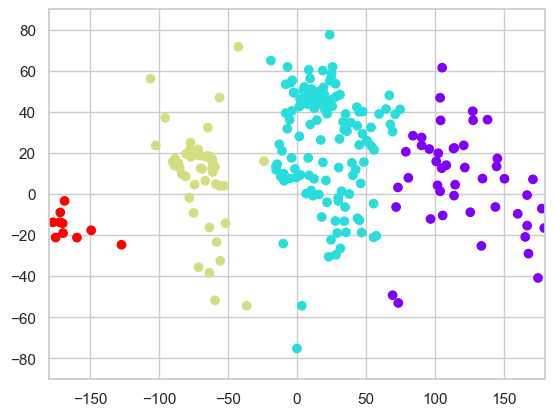

In [31]:
# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(data_with_clusters['longitude'],data_with_clusters['latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

wcss = []

for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\sanikj\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

[488.00000000000006,
 306.08844973510503,
 184.60949561720514,
 139.63900261216307,
 109.29647610188266,
 87.19981626033132,
 69.30846584109331,
 59.29829352633687,
 49.917262646067655]

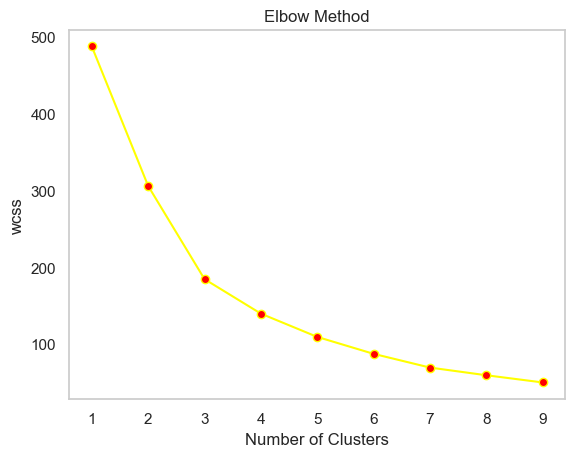

In [26]:
plt.plot(list(range(1, len(wcss) + 1)), wcss, marker="o", color="yellow", linestyle="-", markerfacecolor="red")
plt.title("Elbow Method")
plt.grid()
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

## Further clarifications
In fact, if you read about it, the original dataset has 3 sub-species of the Iris flower. Therefore, the number of clusters is 3.

This shows us that:
<li> the Eblow method is imperfect (we might have opted for 2 or even 4) </li>
<li> k-means is very useful in moments where we already know the number of clusters - in this case: 3 </li>
<li> biology cannot be always quantified (or better).. quantified with k-means! Other methods are much better at that </li>

Finally, you can try to classify them (instead of cluster them, now that you have all the data)! 